* Name: **Vu Truong Si**
* Github: **vutruong99**
* USC ID: **6031936649**

In [1]:
from scipy.stats import bootstrap
import pandas as pd
import numpy as np
import bootstrapped.stats_functions as bs_stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from liblinear.liblinearutil import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import cross_val_score

**Data Import from Homework 3**

In [2]:
# Bending 1 datasets.

bending1_dataset1 = pd.read_csv("../data/AReM/bending1/dataset1.csv", skiprows = 4)
bending1_dataset2 = pd.read_csv("../data/AReM/bending1/dataset2.csv", skiprows = 4)
bending1_dataset3 = pd.read_csv("../data/AReM/bending1/dataset3.csv", skiprows = 4)
bending1_dataset4 = pd.read_csv("../data/AReM/bending1/dataset4.csv", skiprows = 4)
bending1_dataset5 = pd.read_csv("../data/AReM/bending1/dataset5.csv", skiprows = 4)
bending1_dataset6 = pd.read_csv("../data/AReM/bending1/dataset6.csv", skiprows = 4)
bending1_dataset7 = pd.read_csv("../data/AReM/bending1/dataset7.csv", skiprows = 4)

bending1_datasets = [bending1_dataset1, bending1_dataset2, bending1_dataset3, bending1_dataset4, bending1_dataset5,
                    bending1_dataset6,bending1_dataset7]

for dataset in bending1_datasets:
    dataset.insert(7,'Type', ["bending"]*len(dataset))

In [3]:
# Bending 2 datasets.

bending2_dataset1 = pd.read_csv("../data/AReM/bending2/dataset1.csv", skiprows = 4)
bending2_dataset2 = pd.read_csv("../data/AReM/bending2/dataset2.csv", skiprows = 4)
bending2_dataset3 = pd.read_csv("../data/AReM/bending2/dataset3.csv", skiprows = 4)
bending2_dataset4 = pd.read_csv("../data/AReM/bending2/dataset4.csv", skiprows = 4)
bending2_dataset5 = pd.read_csv("../data/AReM/bending2/dataset5.csv", skiprows = 4)
bending2_dataset6 = pd.read_csv("../data/AReM/bending2/dataset6.csv", skiprows = 4)

bending2_datasets = [bending2_dataset1, bending2_dataset2, bending2_dataset3, bending2_dataset4, bending2_dataset5, 
                     bending2_dataset6]

for dataset in bending2_datasets:
    dataset.insert(7,'Type', ["bending"]*len(dataset))

In [4]:
# Cycling datasets.

cycling_dataset1 = pd.read_csv("../data/AReM/cycling/dataset1.csv", skiprows = 4)
cycling_dataset2 = pd.read_csv("../data/AReM/cycling/dataset2.csv", skiprows = 4)
cycling_dataset3 = pd.read_csv("../data/AReM/cycling/dataset3.csv", skiprows = 4)
cycling_dataset4 = pd.read_csv("../data/AReM/cycling/dataset4.csv", skiprows = 4)
cycling_dataset5 = pd.read_csv("../data/AReM/cycling/dataset5.csv", skiprows = 4)
cycling_dataset6 = pd.read_csv("../data/AReM/cycling/dataset6.csv", skiprows = 4)
cycling_dataset7 = pd.read_csv("../data/AReM/cycling/dataset7.csv", skiprows = 4)
cycling_dataset8 = pd.read_csv("../data/AReM/cycling/dataset8.csv", skiprows = 4)
cycling_dataset9 = pd.read_csv("../data/AReM/cycling/dataset9.csv", skiprows = 4)
cycling_dataset10 = pd.read_csv("../data/AReM/cycling/dataset10.csv", skiprows = 4)
cycling_dataset11 = pd.read_csv("../data/AReM/cycling/dataset11.csv", skiprows = 4)
cycling_dataset12 = pd.read_csv("../data/AReM/cycling/dataset12.csv", skiprows = 4)
cycling_dataset13 = pd.read_csv("../data/AReM/cycling/dataset13.csv", skiprows = 4)
cycling_dataset14 = pd.read_csv("../data/AReM/cycling/dataset14.csv", skiprows = 4)
cycling_dataset15 = pd.read_csv("../data/AReM/cycling/dataset15.csv", skiprows = 4)

cycling_datasets = [cycling_dataset1, cycling_dataset2, cycling_dataset3, cycling_dataset4, cycling_dataset5, cycling_dataset6,
                    cycling_dataset7, cycling_dataset8, cycling_dataset9, cycling_dataset10, cycling_dataset11, cycling_dataset12,
                     cycling_dataset13, cycling_dataset14, cycling_dataset15]

for dataset in cycling_datasets:
    dataset.insert(7,'Type', ["other"]*len(dataset))

In [5]:
# Lying datasets.

lying_dataset1 = pd.read_csv("../data/AReM/lying/dataset1.csv", skiprows = 4)
lying_dataset2 = pd.read_csv("../data/AReM/lying/dataset2.csv", skiprows = 4)
lying_dataset3 = pd.read_csv("../data/AReM/lying/dataset3.csv", skiprows = 4)
lying_dataset4 = pd.read_csv("../data/AReM/lying/dataset4.csv", skiprows = 4)
lying_dataset5 = pd.read_csv("../data/AReM/lying/dataset5.csv", skiprows = 4)
lying_dataset6 = pd.read_csv("../data/AReM/lying/dataset6.csv", skiprows = 4)
lying_dataset7 = pd.read_csv("../data/AReM/lying/dataset7.csv", skiprows = 4)
lying_dataset8 = pd.read_csv("../data/AReM/lying/dataset8.csv", skiprows = 4)
lying_dataset9 = pd.read_csv("../data/AReM/lying/dataset9.csv", skiprows = 4)
lying_dataset10 = pd.read_csv("../data/AReM/lying/dataset10.csv", skiprows = 4)
lying_dataset11 = pd.read_csv("../data/AReM/lying/dataset11.csv", skiprows = 4)
lying_dataset12 = pd.read_csv("../data/AReM/lying/dataset12.csv", skiprows = 4)
lying_dataset13 = pd.read_csv("../data/AReM/lying/dataset13.csv", skiprows = 4)
lying_dataset14 = pd.read_csv("../data/AReM/lying/dataset14.csv", skiprows = 4)
lying_dataset15 = pd.read_csv("../data/AReM/lying/dataset15.csv", skiprows = 4)

lying_datasets = [lying_dataset1, lying_dataset2, lying_dataset3, lying_dataset4, lying_dataset5, lying_dataset6,
                    lying_dataset7, lying_dataset8, lying_dataset9, lying_dataset10, lying_dataset11, lying_dataset12,
                     lying_dataset13, lying_dataset14, lying_dataset15]

for dataset in lying_datasets:
    dataset.insert(7,'Type', ["other"]*len(dataset))

In [6]:
# Sitting datasets.

sitting_dataset1 = pd.read_csv("../data/AReM/sitting/dataset1.csv", skiprows = 4)
sitting_dataset2 = pd.read_csv("../data/AReM/sitting/dataset2.csv", skiprows = 4)
sitting_dataset3 = pd.read_csv("../data/AReM/sitting/dataset3.csv", skiprows = 4)
sitting_dataset4 = pd.read_csv("../data/AReM/sitting/dataset4.csv", skiprows = 4)
sitting_dataset5 = pd.read_csv("../data/AReM/sitting/dataset5.csv", skiprows = 4)
sitting_dataset6 = pd.read_csv("../data/AReM/sitting/dataset6.csv", skiprows = 4)
sitting_dataset7 = pd.read_csv("../data/AReM/sitting/dataset7.csv", skiprows = 4)
sitting_dataset8 = pd.read_csv("../data/AReM/sitting/dataset8.csv", skiprows = 4)
sitting_dataset9 = pd.read_csv("../data/AReM/sitting/dataset9.csv", skiprows = 4)
sitting_dataset10 = pd.read_csv("../data/AReM/sitting/dataset10.csv", skiprows = 4)
sitting_dataset11 = pd.read_csv("../data/AReM/sitting/dataset11.csv", skiprows = 4)
sitting_dataset12 = pd.read_csv("../data/AReM/sitting/dataset12.csv", skiprows = 4)
sitting_dataset13 = pd.read_csv("../data/AReM/sitting/dataset13.csv", skiprows = 4)
sitting_dataset14 = pd.read_csv("../data/AReM/sitting/dataset14.csv", skiprows = 4)
sitting_dataset15 = pd.read_csv("../data/AReM/sitting/dataset15.csv", skiprows = 4)

sitting_datasets = [sitting_dataset1, sitting_dataset2, sitting_dataset3, sitting_dataset4, sitting_dataset5, sitting_dataset6,
                    sitting_dataset7, sitting_dataset8, sitting_dataset9, sitting_dataset10, sitting_dataset11, sitting_dataset12,
                     sitting_dataset13, sitting_dataset14, sitting_dataset15]

for dataset in sitting_datasets:
    dataset.insert(7,'Type', ["other"]*len(dataset))

In [7]:
# Standing datasets.

standing_dataset1 = pd.read_csv("../data/AReM/standing/dataset1.csv", skiprows = 4)
standing_dataset2 = pd.read_csv("../data/AReM/standing/dataset2.csv", skiprows = 4)
standing_dataset3 = pd.read_csv("../data/AReM/standing/dataset3.csv", skiprows = 4)
standing_dataset4 = pd.read_csv("../data/AReM/standing/dataset4.csv", skiprows = 4)
standing_dataset5 = pd.read_csv("../data/AReM/standing/dataset5.csv", skiprows = 4)
standing_dataset6 = pd.read_csv("../data/AReM/standing/dataset6.csv", skiprows = 4)
standing_dataset7 = pd.read_csv("../data/AReM/standing/dataset7.csv", skiprows = 4)
standing_dataset8 = pd.read_csv("../data/AReM/standing/dataset8.csv", skiprows = 4)
standing_dataset9 = pd.read_csv("../data/AReM/standing/dataset9.csv", skiprows = 4)
standing_dataset10 = pd.read_csv("../data/AReM/standing/dataset10.csv", skiprows = 4)
standing_dataset11 = pd.read_csv("../data/AReM/standing/dataset11.csv", skiprows = 4)
standing_dataset12 = pd.read_csv("../data/AReM/standing/dataset12.csv", skiprows = 4)
standing_dataset13 = pd.read_csv("../data/AReM/standing/dataset13.csv", skiprows = 4)
standing_dataset14 = pd.read_csv("../data/AReM/standing/dataset14.csv", skiprows = 4)
standing_dataset15 = pd.read_csv("../data/AReM/standing/dataset15.csv", skiprows = 4)

standing_datasets = [standing_dataset1, standing_dataset2, standing_dataset3, standing_dataset4, standing_dataset5, standing_dataset6,
                    standing_dataset7, standing_dataset8, standing_dataset9, standing_dataset10, standing_dataset11, standing_dataset12,
                     standing_dataset13, standing_dataset14, standing_dataset15]

for dataset in standing_datasets:
    dataset.insert(7,'Type', ["other"]*len(dataset))

In [8]:
# Walking datasets.

walking_dataset1 = pd.read_csv("../data/AReM/walking/dataset1.csv", skiprows = 4)
walking_dataset2 = pd.read_csv("../data/AReM/walking/dataset2.csv", skiprows = 4)
walking_dataset3 = pd.read_csv("../data/AReM/walking/dataset3.csv", skiprows = 4)
walking_dataset4 = pd.read_csv("../data/AReM/walking/dataset4.csv", skiprows = 4)
walking_dataset5 = pd.read_csv("../data/AReM/walking/dataset5.csv", skiprows = 4)
walking_dataset6 = pd.read_csv("../data/AReM/walking/dataset6.csv", skiprows = 4)
walking_dataset7 = pd.read_csv("../data/AReM/walking/dataset7.csv", skiprows = 4)
walking_dataset8 = pd.read_csv("../data/AReM/walking/dataset8.csv", skiprows = 4)
walking_dataset9 = pd.read_csv("../data/AReM/walking/dataset9.csv", skiprows = 4)
walking_dataset10 = pd.read_csv("../data/AReM/walking/dataset10.csv", skiprows = 4)
walking_dataset11 = pd.read_csv("../data/AReM/walking/dataset11.csv", skiprows = 4)
walking_dataset12 = pd.read_csv("../data/AReM/walking/dataset12.csv", skiprows = 4)
walking_dataset13 = pd.read_csv("../data/AReM/walking/dataset13.csv", skiprows = 4)
walking_dataset14 = pd.read_csv("../data/AReM/walking/dataset14.csv", skiprows = 4)
walking_dataset15 = pd.read_csv("../data/AReM/walking/dataset15.csv", skiprows = 4)

walking_datasets = [walking_dataset1, walking_dataset2, walking_dataset3, walking_dataset4, walking_dataset5, walking_dataset6,
                    walking_dataset7, walking_dataset8, walking_dataset9, walking_dataset10, walking_dataset11, walking_dataset12,
                     walking_dataset13, walking_dataset14, walking_dataset15]

for dataset in walking_datasets:
    dataset.insert(7,'Type', ["other"]*len(dataset))

In [9]:
all_datasets_ = [bending1_datasets, bending2_datasets, cycling_datasets, lying_datasets, sitting_datasets, standing_datasets,
               walking_datasets]

In [10]:
# Function to concatenate datasets together. 

def create_datasets(list_of_dataframes):
    count = 0
    labels = []
    result_dataframe = list_of_dataframes[0]
    for dataframe in list_of_dataframes[:-1]:
        result_dataframe = pd.concat([result_dataframe, dataframe] , axis = 0)
        
    return result_dataframe

In [11]:
# List of training datasets.

training_list = []
training_list.extend(bending1_datasets[1:-1])
training_list.extend(bending2_datasets[1:-1])
training_list.extend(cycling_datasets[2:-1])
training_list.extend(lying_datasets[2:-1])
training_list.extend(sitting_datasets[2:-1])
training_list.extend(standing_datasets[2:-1])
training_list.extend(walking_datasets[2:-1])

In [12]:
print("Length of training list:", len(training_list))

Length of training list: 69


In [13]:
# List of test datasets.

test_list = []
test_list.extend(bending1_datasets[:2])
test_list.extend(bending2_datasets[:2])
test_list.extend(cycling_datasets[:3])
test_list.extend(lying_datasets[:3])
test_list.extend(sitting_datasets[:3])
test_list.extend(standing_datasets[:3])
test_list.extend(walking_datasets[:3])

In [14]:
print("Length of test list:", len(test_list))

Length of test list: 19


In [15]:
# Create training and test sets.

training_datasets = create_datasets(training_list)
test_datasets = create_datasets(test_list)

In [16]:
training_datasets

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Type
0,0,43.67,0.47,24.75,0.43,30.00,0.00,bending
1,250,43.33,0.47,25.33,0.47,30.00,0.00,bending
2,500,42.75,0.83,25.25,0.83,30.50,0.50,bending
3,750,41.75,0.43,20.50,3.35,30.75,0.83,bending
4,1000,42.50,0.50,20.75,4.55,31.75,0.43,bending
...,...,...,...,...,...,...,...,...
475,118750,26.00,1.63,15.67,2.62,18.00,5.05,other
476,119000,37.33,6.13,8.67,5.79,10.75,3.03,other
477,119250,37.75,5.45,19.50,1.12,12.33,1.25,other
478,119500,37.00,1.73,13.75,3.42,17.25,6.53,other


In [17]:
test_datasets

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Type
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending
...,...,...,...,...,...,...,...,...
475,118750,27.75,5.76,13.25,1.30,16.25,2.49,other
476,119000,38.25,5.12,14.75,2.17,15.00,6.36,other
477,119250,34.00,2.83,17.00,5.39,9.00,4.97,other
478,119500,29.00,5.72,12.00,6.60,12.67,5.44,other


**2. Time Series Classification Part 2: Binary and Multiclass Classification**

**i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).**

In [19]:
# The 3 features I chose from Homework 3 were mean, median, and standard deviation.
# Here I calculate those 3 features for time series 1, 2, and 6 for each instance.

mean_avg_rss12 = []
median_avg_rss12 = []
std_avg_rss_12 = []
mean_var_rss12 = []
median_rss12 = []
std_var_rss12 = []
mean_var_rss23 = []
median_var_rss23 = []
std_var_rss23 = []

for dataset in training_list:
    mean_avg_rss12.append(dataset["avg_rss12"].mean())
    median_avg_rss12.append(dataset["avg_rss12"].median())
    std_avg_rss_12.append(dataset["avg_rss12"].std())
    mean_var_rss12.append(dataset["var_rss12"].mean())
    median_rss12.append(dataset["var_rss12"].median())
    std_var_rss12.append(dataset["var_rss12"].std())
    mean_var_rss23.append(dataset["var_rss23"].mean())
    median_var_rss23.append(dataset["var_rss23"].median())
    std_var_rss23.append(dataset["var_rss23"].std())

In [20]:
# Assign appropriate labels.

types = []
for i in range(69):
    if i < 9:
        types.append("Bending")
    else:
        types.append("Other")

In [21]:
mms_126 = pd.DataFrame(zip(mean_avg_rss12, median_avg_rss12, std_avg_rss_12, mean_var_rss12, median_rss12, std_var_rss12, mean_var_rss23, median_var_rss23, std_var_rss23), 
                       columns = ["mean_avg_rss12", "median_avg_rss12", "std_avg_rss_12", "mean_var_rss12",
                                 "median_rss12", "std_var_rss12", "mean_var_rss23", "median_var_rss23", "std_var_rss23"])
mms_126.insert(9,'Type', types)

In [22]:
mms_126

,mean_avg_rss12,median_avg_rss12,std_avg_rss_12,mean_var_rss12,median_rss12,std_var_rss12,mean_var_rss23,median_var_rss23,std_var_rss23,Type
0,42.812812,42.50,1.435550,0.372438,0.470,0.289158,0.571083,0.430,0.601010,Bending
1,43.954500,44.33,1.558835,0.426250,0.470,0.338690,0.493292,0.430,0.513506,Bending
2,42.179813,43.50,3.670666,0.696042,0.500,0.630860,0.613521,0.500,0.524317,Bending
3,41.678063,41.75,2.243490,0.535979,0.500,0.405469,0.383292,0.430,0.389164,Bending
4,43.454958,43.25,1.386098,0.378083,0.470,0.315566,0.679646,0.500,0.622534,Bending
...,...,...,...,...,...,...,...,...,...,...
64,34.253521,35.00,4.940741,4.457896,4.150,2.387192,3.500750,3.285,1.692378,Other
65,33.586875,34.25,4.650935,4.576562,4.260,2.461077,3.259729,3.110,1.640243,Other
66,34.322750,35.25,4.752477,4.456333,3.900,2.599284,3.432562,3.200,1.732727,Other
67,34.546229,35.25,4.842294,4.371958,4.135,2.360448,3.338125,3.080,1.656742,Other


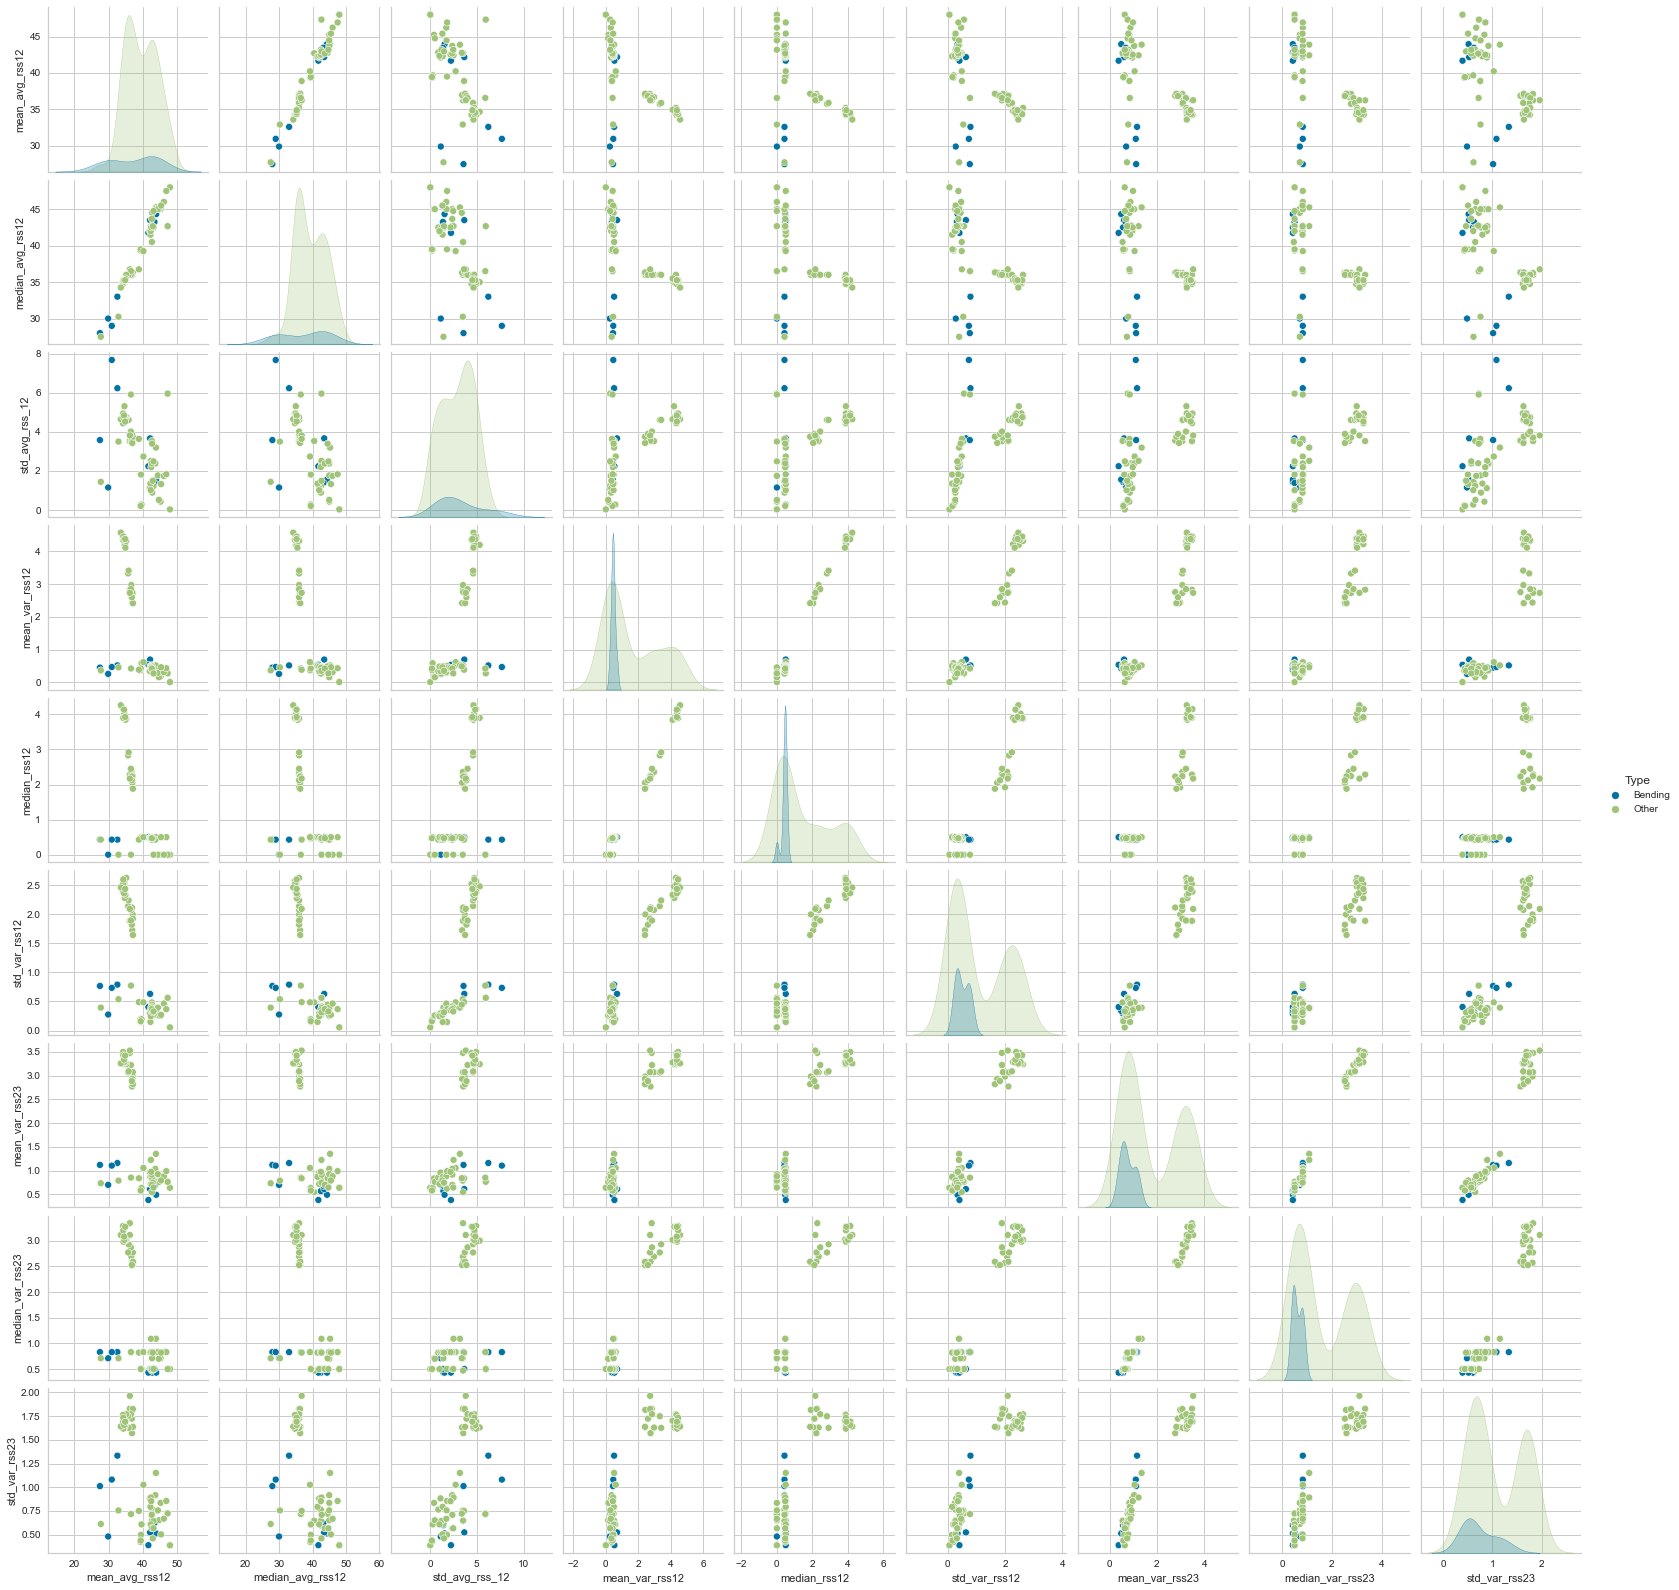

In [23]:
# 9x9 Scatter plot for the features.

sns.pairplot(mms_126, hue = "Type")

**ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?**

In [24]:
# Function to split a dataset into 2.

def split_dataset(dataset):
    dataset = dataset.drop(columns = "Type")
    df1 = dataset.iloc[:240]
    df2 = dataset.iloc[240:]
    df2 = df2.drop(columns = "# Columns: time")
    df2.columns = ["avg_rss12_v2","var_rss12_v2","avg_rss13_v2","var_rss13_v2","avg_rss23_v2","var_rss23_v2"]
    df3 = pd.concat([df1, df2.reset_index()], axis = 1)
    
    return df3.drop(columns = ["index"])

In [25]:
# Split each instance in the training set into 2 parts.

new_training_list = []
for dataset in training_list.copy():
    new_training_list.append(split_dataset(dataset))

In [26]:
# Calculate 3 the features for all time series.

mean_avg_rss12 = []
median_avg_rss12 = []
std_avg_rss12 = []
mean_var_rss12 = []
median_rss12 = []
std_var_rss12 = []
mean_var_rss23 = []
median_var_rss23 = []
std_var_rss23 = []
mean_avg_rss12_v2 = []
median_avg_rss12_v2 = []
std_avg_rss_12_v2 = []
mean_var_rss12_v2 = []
median_rss12_v2 = []
std_var_rss12_v2 = []
mean_var_rss23_v2 = []
median_var_rss23_v2 = []
std_var_rss23_v2 = []


for dataset in new_training_list:
    mean_avg_rss12.append(dataset["avg_rss12"].mean())
    median_avg_rss12.append(dataset["avg_rss12"].median())
    std_avg_rss12.append(dataset["avg_rss12"].std())
    mean_var_rss12.append(dataset["var_rss12"].mean())
    median_rss12.append(dataset["var_rss12"].median())
    std_var_rss12.append(dataset["var_rss12"].std())
    mean_var_rss23.append(dataset["var_rss23"].mean())
    median_var_rss23.append(dataset["var_rss23"].median())
    std_var_rss23.append(dataset["var_rss23"].std())
        
    mean_avg_rss12_v2.append(dataset["avg_rss12_v2"].mean())
    median_avg_rss12_v2.append(dataset["avg_rss12_v2"].median())
    std_avg_rss_12_v2.append(dataset["avg_rss12_v2"].std())
    mean_var_rss12_v2.append(dataset["var_rss12_v2"].mean())
    median_rss12_v2.append(dataset["var_rss12_v2"].median())
    std_var_rss12_v2.append(dataset["var_rss12_v2"].std())
    mean_var_rss23_v2.append(dataset["var_rss23_v2"].mean())
    median_var_rss23_v2.append(dataset["var_rss23_v2"].median())
    std_var_rss23_v2.append(dataset["var_rss23_v2"].std())

In [27]:
# Assign appropriate labels.

types_v2 = []
for i in range(69):
    if i < 4:
        types_v2.append("Bending")
    else:
        types_v2.append("Others")

In [28]:
mms_126_v2 = pd.DataFrame(zip(mean_avg_rss12, median_avg_rss12, std_avg_rss12, mean_var_rss12, median_rss12, std_var_rss12, mean_var_rss23, median_var_rss23, std_var_rss23,
                             mean_avg_rss12_v2, median_avg_rss12_v2, std_avg_rss_12_v2, mean_var_rss12_v2, median_rss12_v2, std_var_rss12_v2, mean_var_rss23_v2, median_var_rss23_v2, std_var_rss23_v2), 
                       columns = ["mean_avg_rss12", "median_avg_rss12", "std_avg_rss12", "mean_var_rss12",
                                 "median_rss12", "std_var_rss12", "mean_var_rss23", "median_var_rss23", "std_var_rss23",
                                 "mean_avg_rss12_v2", "median_avg_rss12_v2", "std_avg_rss_12_v2", "mean_var_rss12_v2",
                                 "median_rss12_v2", "std_var_rss12_v2", "mean_var_rss23_v2", "median_var_rss23_v2", "std_var_rss23_v2"])

mms_126_v2.insert(18,'Type', types_v2)

In [29]:
mms_126_v2

,mean_avg_rss12,median_avg_rss12,std_avg_rss12,mean_var_rss12,median_rss12,std_var_rss12,mean_var_rss23,median_var_rss23,std_var_rss23,mean_avg_rss12_v2,median_avg_rss12_v2,std_avg_rss_12_v2,mean_var_rss12_v2,median_rss12_v2,std_var_rss12_v2,mean_var_rss23_v2,median_var_rss23_v2,std_var_rss23_v2,Type
0,42.643292,42.500,0.641849,0.355000,0.470,0.258298,0.608583,0.430,0.624834,42.982333,43.375,1.913255,0.389875,0.47,0.316617,0.533583,0.430,0.575061,Bending
1,44.057167,44.500,1.556971,0.381042,0.470,0.329540,0.598250,0.500,0.526656,43.851833,43.500,1.557168,0.471458,0.50,0.342346,0.388333,0.000,0.478528,Bending
2,43.278875,45.000,3.473355,0.673292,0.485,0.634285,0.640958,0.765,0.554542,41.080750,42.000,3.537481,0.718792,0.50,0.627915,0.586083,0.470,0.491873,Bending
3,41.621208,42.330,3.118644,0.623083,0.500,0.489595,0.419083,0.430,0.411200,41.734917,41.500,0.595920,0.448875,0.50,0.273050,0.347500,0.430,0.363144,Bending
4,44.117042,45.000,1.359836,0.250042,0.000,0.314099,0.815417,0.710,0.718016,42.792875,42.670,1.058792,0.506125,0.50,0.260761,0.543875,0.500,0.473445,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,33.907292,34.500,4.716603,4.619875,4.500,2.525474,3.454333,3.340,1.645684,34.599750,35.625,5.141681,4.295917,3.96,2.233944,3.547167,3.270,1.740018,Others
65,33.334500,34.000,4.874433,4.408083,4.195,2.196206,3.229167,3.110,1.637310,33.839250,34.500,4.411903,4.745042,4.32,2.694219,3.290292,3.155,1.646023,Others
66,34.036750,34.415,4.872880,4.778292,4.030,2.762730,3.543708,3.255,1.703098,34.608750,35.500,4.621400,4.134375,3.74,2.387460,3.321417,3.155,1.758379,Others
67,34.033875,35.000,4.758757,4.574625,4.470,2.391804,3.244042,2.980,1.619767,35.058583,35.875,4.880650,4.169292,3.88,2.315929,3.432208,3.255,1.691050,Others


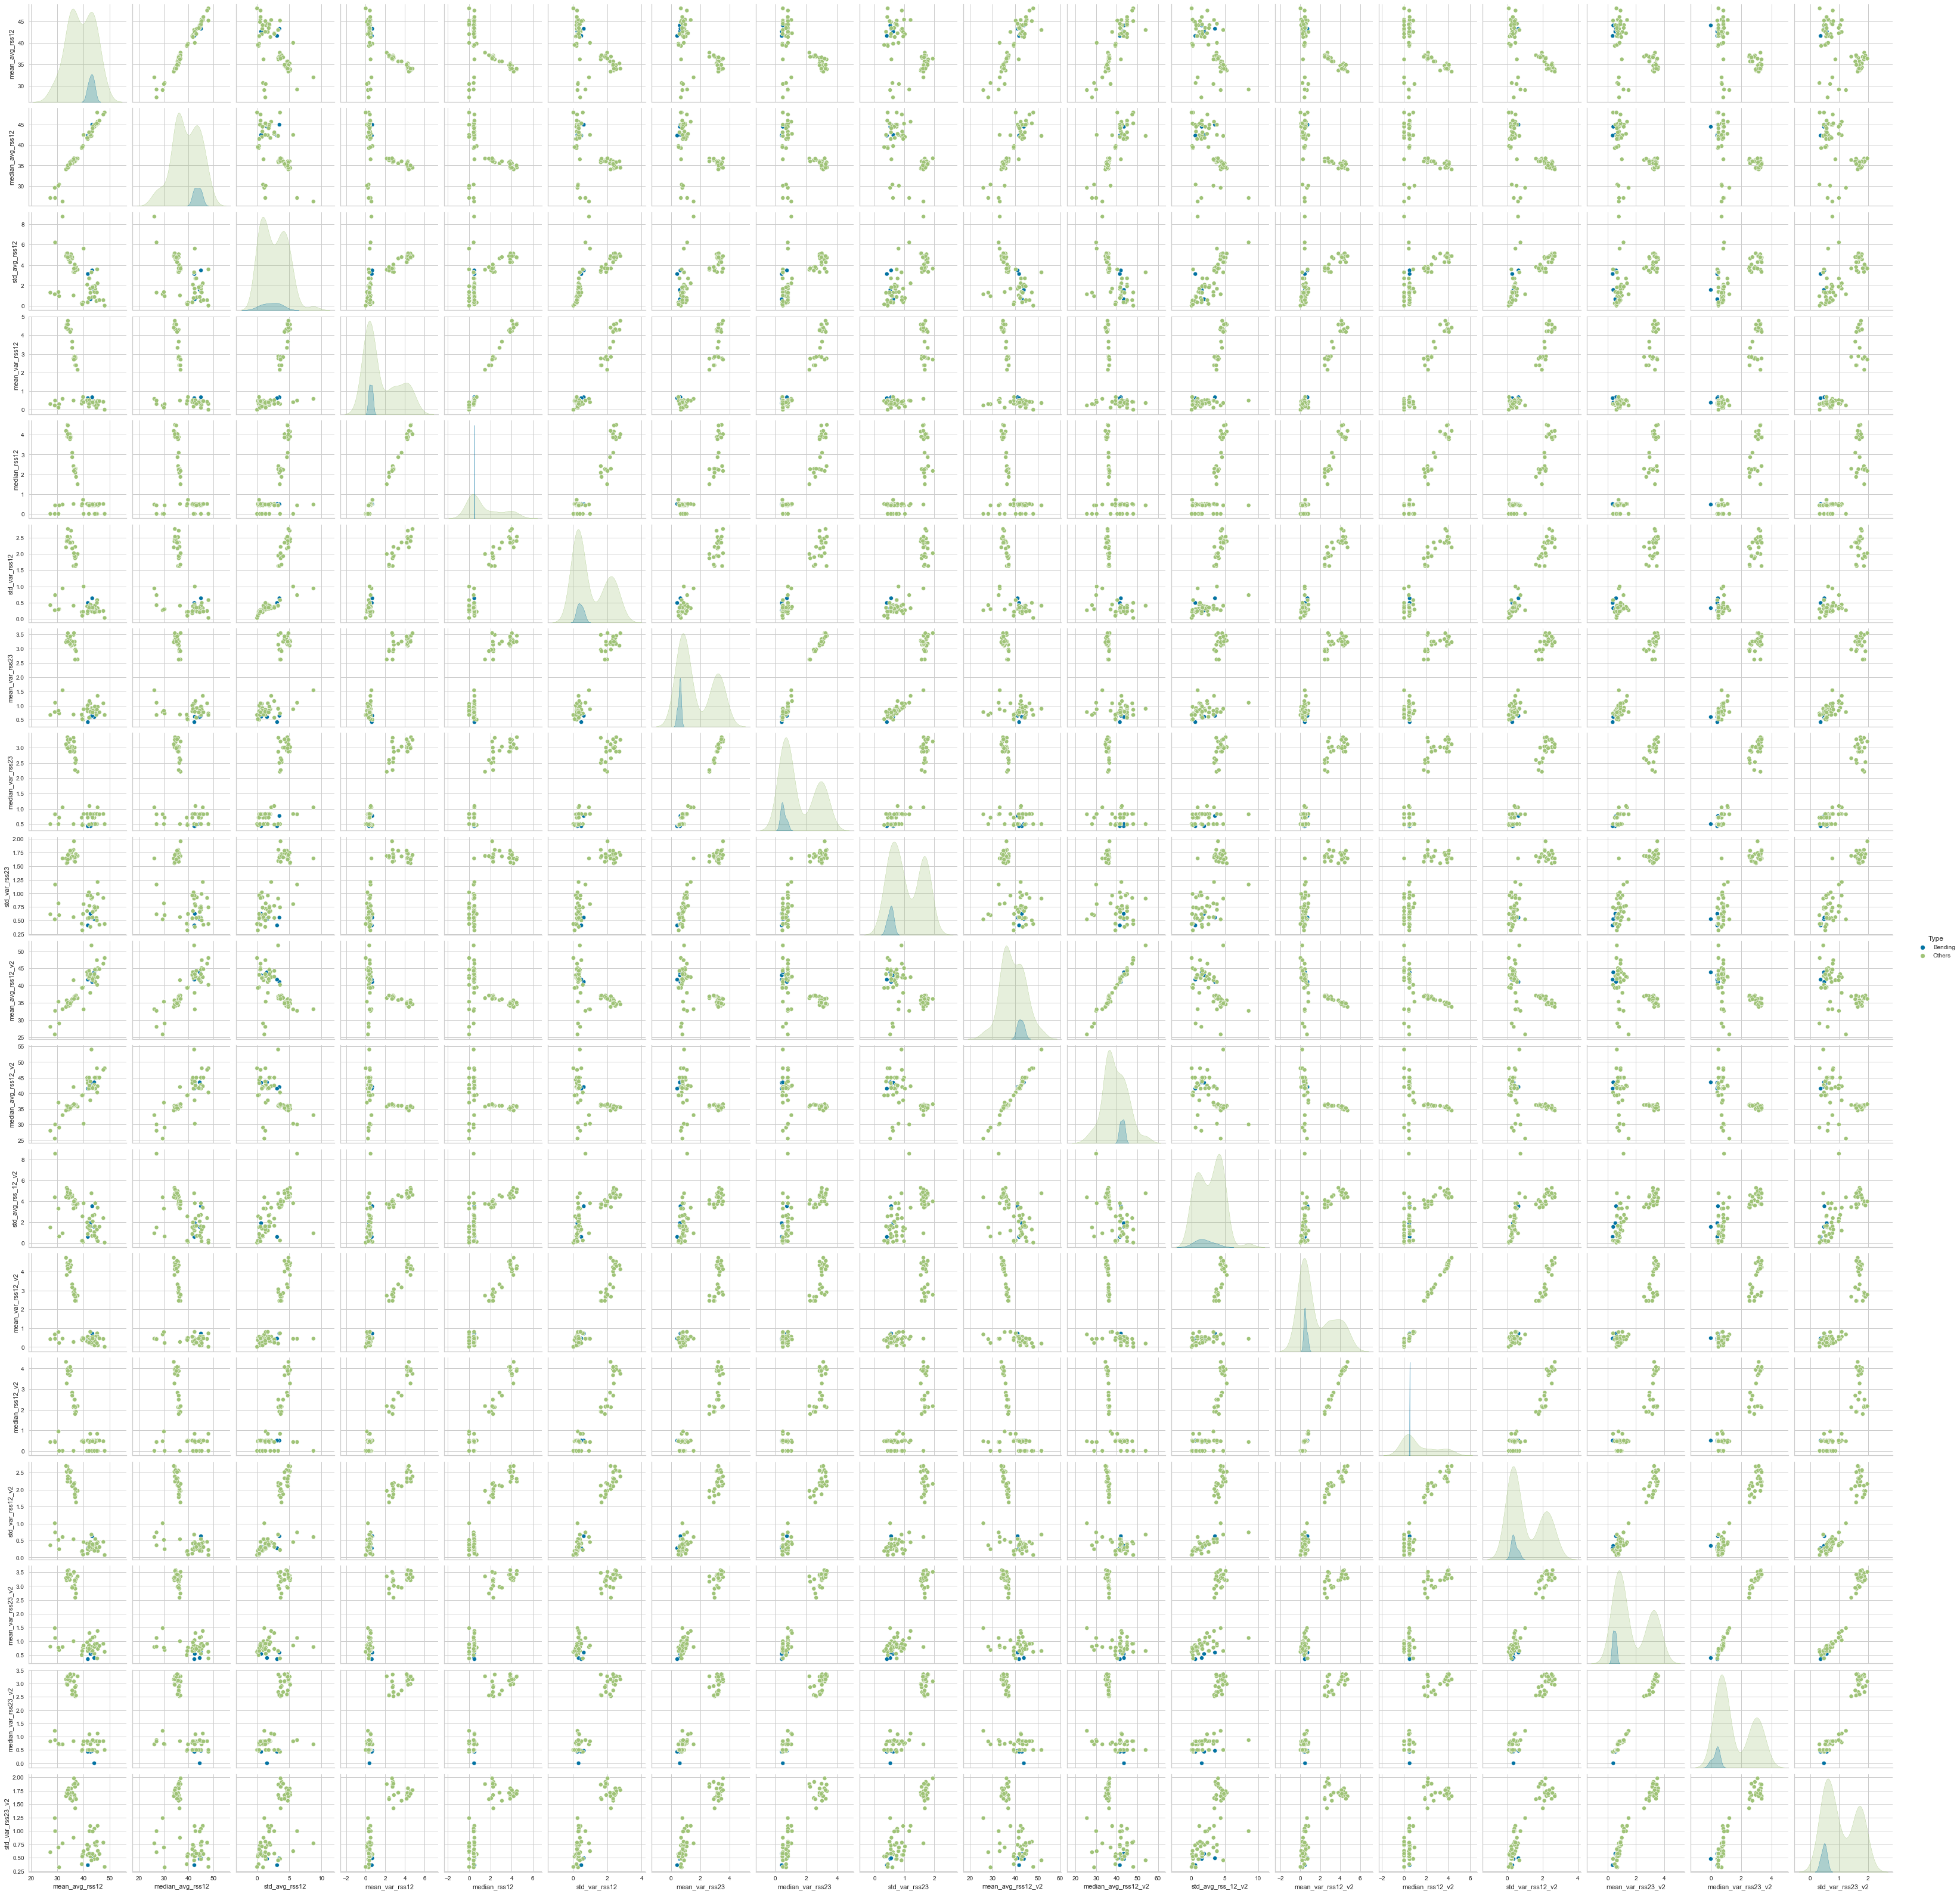

In [30]:
sns.pairplot(mms_126_v2, hue = "Type")

For the same time series in a.i, there is no noticeable difference. The only thing worth pointing out is that after splitting the data, we have even less points for the bending class. 

**iii. Break each time series in your training set into l in set {1, 2, ..., 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.
Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python's Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.**

In [31]:
# Assign appropriate labels: 1 for bending, 0 for other activities.

training_labels = []
for i in range(69):
    if i < 9:
        training_labels.append(1)
    else:
        training_labels.append(0)
        
test_labels = []
for i in range(19):
    if i < 4:
        test_labels.append(1)
    else:
        test_labels.append(0)

In [107]:
# Function to split each instance in the training list in to L = (1,2,...,20) parts
# then calculate the 3 features for each time serie.
label_list = []

def split_time_series(dataset_list, test_or_train):
    split_datasets = []
    
    
    for l in range(1,21):
        
        empty_dataset = [] # 18,36,54,...,360 features for each instance.
        for dataset in dataset_list:
            features = []
            labels = []
            split_time_series = np.array_split(dataset,l)
            for split_series in split_time_series:
                features.append(split_series["avg_rss12"].mean())
                features.append(split_series["avg_rss12"].median())
                features.append(split_series["avg_rss12"].std())

                features.append(split_series["var_rss12"].mean())
                features.append(split_series["var_rss12"].median())
                features.append(split_series["var_rss12"].std())

                features.append(split_series["avg_rss13"].mean())
                features.append(split_series["avg_rss13"].median())
                features.append(split_series["avg_rss13"].std())

                features.append(split_series["var_rss13"].mean())
                features.append(split_series["var_rss13"].median())
                features.append(split_series["var_rss13"].std())

                features.append(split_series["avg_rss23"].mean())
                features.append(split_series["avg_rss23"].median())
                features.append(split_series["avg_rss23"].std())

                features.append(split_series["var_rss23"].mean())
                features.append(split_series["var_rss23"].median())
                features.append(split_series["var_rss23"].std())
                
               
            empty_dataset.append(features)
            
        for i in range(1, (int(len(features) // (3*6))) + 1):
            y = str(i)
            labels.append("avg_rss12_mean_" + y)
            labels.append("avg_rss12_median_" + y)
            labels.append("avg_rss12_std_" + y)
                
            labels.append("var_rss12_mean_" + y)
            labels.append("var_rss12_median_" + y)
            labels.append("var_rss12_std_" + y)
                
            labels.append("avg_rss13_mean_" + y)
            labels.append("avg_rss13_median_" + y)
            labels.append("avg_rss13_std_" + y)
                
            labels.append("var_rss13_mean_" + y)
            labels.append("var_rss13_median_" + y)
            labels.append("var_rss13_std_" + y)
                
            labels.append("avg_rss23_mean_" + y)
            labels.append("avg_rss23_median_" + y)
            labels.append("avg_rss23_std_" + y)
                
            labels.append("var_rss23_mean_" + y)
            labels.append("var_rss23_medan_" + y)
            labels.append("var_rss23_std_" + y)
            
           
        label_list.append(labels)
            
        result_dataset = pd.DataFrame(empty_dataset)
        if test_or_train == "train":
            result_dataset.insert(3*6*l,'Type',training_labels)
        else:
            result_dataset.insert(3*6*l,'Type',test_labels)
        split_datasets.append(result_dataset)
        
    return split_datasets

In [108]:
# Apply that function to the training and test list to obtain all necessary datasets. 
# 20 datasets in each split.

split_training_datasets = split_time_series(training_list, "train")
split_test_datasets = split_time_series(test_list, "test")

**Cross Validation: The right and wrong way:**
* The wrong way is to choose the set of predictors before choosing the folds. This will cause data leakage as the model will have access to the knowledge in the test set as well.
* The right way is to select the folds, and then choose the set of predictors.

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score

In [110]:
logreg = LogisticRegression(max_iter = 1000)
stratified_kfold = StratifiedKFold(n_splits=5)
best_accuracy = 0
l = 0 
max_test_scores = []
ls_and_ps = []

# Perform Logistic Regression with stratified K-fold on 20 datasets, getting the maximum cross-validation score for each of them.

for dataset in split_training_datasets:
    l = l + 1
    
    selector = RFECV(estimator = logreg, cv = stratified_kfold, scoring = "accuracy", step = 1)
    X_train, y_train = dataset.iloc[:, :3*6*l], dataset["Type"]
    print("Training model for l =", l)
    selector.fit(X_train, y_train)  
    
    ps = np.where(selector.ranking_ == 1)[0]

    max_test_scores.append(max(selector.cv_results_["mean_test_score"]))
           
    accuracy = selector.score(X_train, y_train)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    
    p = selector.n_features_
    
    ls_and_ps.append((l,p, ps))
    
    if l == 20:
        break

Training model for l = 1
Training model for l = 2
Training model for l = 3
Training model for l = 4
Training model for l = 5
Training model for l = 6
Training model for l = 7
Training model for l = 8
Training model for l = 9
Training model for l = 10
Training model for l = 11
Training model for l = 12
Training model for l = 13
Training model for l = 14
Training model for l = 15
Training model for l = 16
Training model for l = 17
Training model for l = 18
Training model for l = 19
Training model for l = 20


In [111]:
print('Best cross validation accuracy:', best_accuracy)

Best cross validation accuracy: 1.0


**iv. Report the confusion matrix and show the ROC and AUC for your classifier
on train data. Report the parameters of your logistic regression Bi's as well
as the p-values associated with them.**

In [112]:
# Find the best (l,p).

max_test_score_index = max_test_scores.index(max(max_test_scores))
best_l_p = ls_and_ps[max_test_score_index]
l = best_l_p[0]
p = best_l_p[1]
ps = list(best_l_p[2])

In [113]:
(l,p)

(4, 8)

In [120]:
# Features.

for i in range(len(label_list[l-1])):
    if i in ps:
        print(label_list[l-1][i])

avg_rss12_std_1
avg_rss23_mean_1
avg_rss23_mean_2
avg_rss23_median_2
avg_rss12_median_3
var_rss12_mean_3
avg_rss23_mean_4
avg_rss23_median_4


In [121]:
# Create a model with the best l,p and refit it.

X_train = split_training_datasets[l-1][ps]
y_train = split_training_datasets[l-1]["Type"]
logreg = sm.Logit(y_train, X_train).fit(method = "lbfgs", maxiter = 100)

In [122]:
print(logreg.summary())

# Note: The p-values are not reliable because the some of the data and results are linearly separated.

                           Logit Regression Results                           
Dep. Variable:                   Type   No. Observations:                   69
Model:                          Logit   Df Residuals:                       61
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                   1.000
Time:                        22:41:02   Log-Likelihood:            -9.6791e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 3.042e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
2             -2.6584   1.31e+04     -0.000      1.000   -2.57e+04    2.57e+04
12             1.5994   3742.808      0.000      1.000   -7334.169    7337.368
30             1.1990   1.36e+04   8.82e-05      1.0

In [123]:
# Predictions on test set and output the confusion matrix.

y_pred = logreg.predict(X_train)
y_pred_round = list(map(round, y_pred))
cm = confusion_matrix(y_train, y_pred_round) 
cm

array([[60,  0],
       [ 0,  9]], dtype=int64)

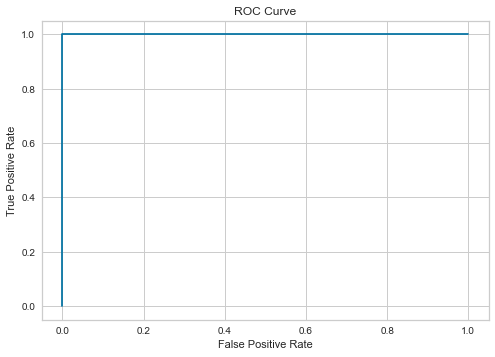

In [124]:
fpr = metrics.roc_curve(y_train,  y_pred_round)[0]
tpr = metrics.roc_curve(y_train,  y_pred_round)[1]
auc = metrics.roc_auc_score(y_train, y_pred_round)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:
print("AUC:", auc)

AUC: 1.0


In [127]:
print('Training accuracy:', accuracy_score(y_train, y_pred_round))

Training accuracy: 1.0


**v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.**

In [128]:
X_test = split_test_datasets[l-1][ps]
y_test = split_test_datasets[l-1]["Type"]
y_pred = logreg.predict(X_test)
y_pred_round = list(map(round, y_pred))
cm = confusion_matrix(y_test, y_pred_round) 
cm

array([[15,  0],
       [ 0,  4]], dtype=int64)

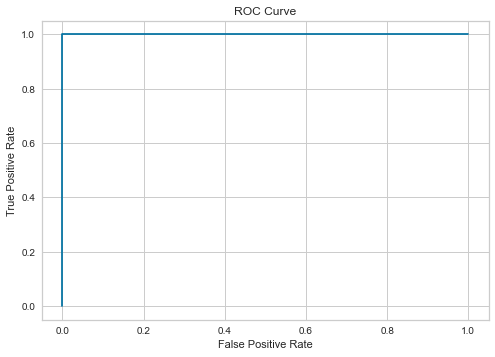

In [129]:
fpr = metrics.roc_curve(y_test,  y_pred_round)[0]
tpr = metrics.roc_curve(y_test,  y_pred_round)[1]
auc = metrics.roc_auc_score(y_test, y_pred_round)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
print("AUC:", auc)

AUC: 1.0


In [131]:
print('Test accuracy', accuracy_score(y_test, y_pred_round))

Test accuracy 1.0


The test accuracy for the model with best (l,p) is 1.0, which is equal to that of the training model.

**vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?**

The classes seem to be well-separated, meaning the outcome of a class can be partially or entirely mapped to a predictor, therefore the logistic regression model is unstable.

**vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model**

There is a problem with imbalanced classes.

In [132]:
# Build a logsitic regression model with SMOTE (Oversampling method)
oversample = SMOTE()

X_train = split_training_datasets[l-1][ps]
y_train = split_training_datasets[l-1]["Type"]
print("Labels BEFORE case-control sampling:", y_train.values, "\n")
X_train, y_train = oversample.fit_resample(X_train, y_train)
print("Labels AFTER case-control sampling:", y_train.values)
logreg = sm.Logit(y_train, X_train).fit(method = "lbfgs", maxiter = 100)

X_test = split_test_datasets[3][[2, 12, 30, 31, 37, 39, 66, 67]]
y_test = split_test_datasets[3]["Type"]
y_pred = logreg.predict(X_test)
y_pred_round = list(map(round, y_pred))
cm = confusion_matrix(y_test, y_pred_round) 
cm

Labels BEFORE case-control sampling: [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

Labels AFTER case-control sampling: [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


array([[15,  0],
       [ 0,  4]], dtype=int64)

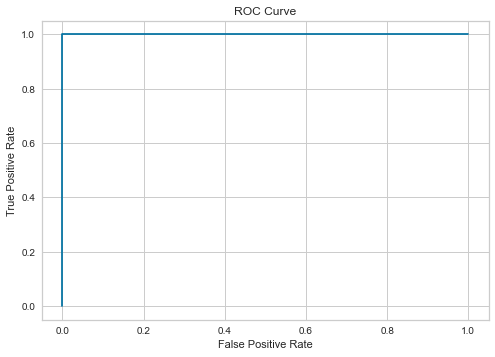

In [133]:
fpr = metrics.roc_curve(y_test,  y_pred_round)[0]
tpr = metrics.roc_curve(y_test,  y_pred_round)[1]
auc = metrics.roc_auc_score(y_test, y_pred_round)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
print("AUC:", auc)

AUC: 1.0


**(b) Binary Classification Using L1-penalized logistic regression**

**i. Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and lambda, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for lambda automatically.**


In [137]:
# Perform Logistic Regression that crosses validate both L1 and C.

logreg_l1 = LogisticRegressionCV(n_jobs = 2, Cs = 10, penalty="l1", solver='liblinear', max_iter = 100, cv = stratified_kfold)
l = 0 
max_test_scores = []
ls_and_ps = []
scaler = StandardScaler()
for dataset in split_training_datasets:
    l = l + 1
    
    X_train, y_train = dataset.iloc[:, :3*6*l], dataset["Type"]
    X_train = scaler.fit_transform(X_train)
    selector = RFECV(estimator = logreg_l1)
    print("Training model for l =", l)
    selector.fit(X_train, y_train)  
    
    ps = np.where(selector.ranking_ == 1)[0]

    max_test_scores.append(max(selector.cv_results_["mean_test_score"]))
        
    p = selector.n_features_
    
    ls_and_ps.append((l,p,ps))
    
    if l == 20:
        break

Training model for l = 1
Training model for l = 2
Training model for l = 3
Training model for l = 4
Training model for l = 5
Training model for l = 6
Training model for l = 7
Training model for l = 8
Training model for l = 9
Training model for l = 10
Training model for l = 11
Training model for l = 12
Training model for l = 13
Training model for l = 14
Training model for l = 15
Training model for l = 16
Training model for l = 17
Training model for l = 18
Training model for l = 19
Training model for l = 20


In [139]:
# Find the best (l,p).

max_test_score_index = max_test_scores.index(max(max_test_scores))
best_l_p = ls_and_ps[max_test_score_index]
l = best_l_p[0]
p = best_l_p[1]
ps = list(best_l_p[2])

In [140]:
(l,p)

(5, 10)

In [141]:
# Features.

for i in range(len(label_list[l-1])):
    if i in ps:
        print(label_list[l-1][i])

avg_rss12_mean_1
avg_rss23_mean_1
avg_rss23_median_1
avg_rss13_std_2
avg_rss23_mean_2
avg_rss13_std_3
avg_rss12_median_4
var_rss13_std_4
var_rss13_median_5
avg_rss23_mean_5


In [142]:
# Create a model with the best l,p and refit it.

X_train = split_training_datasets[l-1][ps]
y_train = split_training_datasets[l-1]["Type"]
logreg = sm.Logit(y_train, X_train).fit(method = "lbfgs", maxiter = 100)

In [143]:
print(logreg.summary())

# Note: The p-values are not reliable because the some of the data and results are linearly separated.

                           Logit Regression Results                           
Dep. Variable:                   Type   No. Observations:                   69
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            9
Date:                Sun, 16 Oct 2022   Pseudo R-squ.:                   1.000
Time:                        23:01:11   Log-Likelihood:            -5.4799e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.417e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.8011   3.54e+04   2.26e-05      1.000   -6.94e+04    6.94e+04
12             2.4598   5.48e+05   4.49e-06      1.000   -1.07e+06    1.07e+06
13             1.3971   4.62e+05   3.02e-06      1.0

**ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?**

I used the alternative (Cross Validation) to select p-values in a.iii. Compared with a.iii, the features in b.i are totally different.

For a.iii we have the following l,p and corresponding features: **(4, 8, avg_rss12_std_1, avg_rss23_mean_1, avg_rss23_mean_2, avg_rss23_median_2, avg_rss12_median_3, var_rss12_mean_3, avg_rss23_median_4)**

while for b.i we have **(5, 10, avg_rss12_mean_1, avg_rss23_mean_1, avg_rss23_median_1, avg_rss13_std_2, avg_rss23_mean_2, avg_rss13_std_3, avg_rss12_median_4, var_rss13_std_4, var_rss13_median_5, avg_rss23_mean_5)**. 

We can see that the scores in a.iii are slightly better, however, I would not conclude that Logistic Regression without L1 penalty is necessarily better in this case. Regarding difficulty, I found both methods equally easy to implement.

**(c) Multi-class Classification (The Realistic Case)**

**i. Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.**

In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
# Assign multi labels. 0 for bending, 1 for cycling, and so on.

training_labels = []
for i in range(69):
    if i < 9:
        training_labels.append(0)
    elif 9<=i and i<21:
        training_labels.append(1)
    elif 21<=i and i<33:
        training_labels.append(2)
    elif 33<=i and i<45:
        training_labels.append(3)
    elif 45<=i and i<57:
        training_labels.append(4)
    elif 57<=i and i<69:
        training_labels.append(5)
        
test_labels = []
for i in range(19):
    if i < 4:
        test_labels.append(0)
    elif 4<=i and i<7:
        test_labels.append(1)
    elif 7<=i and i<10:
        test_labels.append(2)
    elif 10<=i and i<13:
        test_labels.append(3)
    elif 13<=i and i<16:
        test_labels.append(4)
    elif 16<=i and i<19:
        test_labels.append(5)

In [146]:
split_training_datasets = split_time_series(training_list, "train")
split_test_datasets = split_time_series(test_list, "test")

In [183]:
# Multinomial Logistic Regression.

logreg_l1 = LogisticRegressionCV(n_jobs = 2, penalty="l1", solver='liblinear', max_iter = 1000, scoring = 'accuracy')
l = 0 
max_test_scores = []
ls_and_ps = []
scaler = StandardScaler()
for dataset in split_training_datasets:
    ps = []
    l = l + 1
    
    X_train, y_train = dataset.iloc[:, :3*6*l], dataset["Type"]
    X_train = scaler.fit_transform(X_train)
    selector = RFECV(estimator = logreg_l1)
    print("Training model for l =", l)
    selector.fit(X_train, y_train)  
    
    ps = np.where(selector.ranking_ == 1)[0]
            
    max_test_scores.append(max(selector.cv_results_["mean_test_score"]))
 
    p = selector.n_features_
    ls_and_ps.append((l,p, ps))
    
    if l == 20:
        break

Training model for l = 1
Training model for l = 2
Training model for l = 3
Training model for l = 4
Training model for l = 5
Training model for l = 6
Training model for l = 7
Training model for l = 8
Training model for l = 9
Training model for l = 10
Training model for l = 11
Training model for l = 12
Training model for l = 13
Training model for l = 14


C:\Users\truon\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training model for l = 15
Training model for l = 16
Training model for l = 17
Training model for l = 18
Training model for l = 19
Training model for l = 20


In [184]:
# Find the best (l,p).

max_test_score_index = max_test_scores.index(max(max_test_scores))
best_l_p = ls_and_ps[max_test_score_index]
l = best_l_p[0]
p = best_l_p[1]
ps = list(best_l_p[2])

In [188]:
l

20

In [189]:
p

322

In [185]:
# Features.

for i in range(len(label_list[l-1])):
    if i in ps:
        print(label_list[l-1][i])

avg_rss12_mean_1
avg_rss12_median_1
avg_rss12_std_1
var_rss12_mean_1
var_rss12_median_1
var_rss12_std_1
avg_rss13_mean_1
avg_rss13_median_1
avg_rss13_std_1
var_rss13_mean_1
var_rss13_median_1
var_rss13_std_1
avg_rss23_mean_1
avg_rss23_median_1
avg_rss23_std_1
var_rss23_mean_1
var_rss23_medan_1
var_rss23_std_1
avg_rss12_mean_2
avg_rss12_median_2
avg_rss12_std_2
var_rss12_mean_2
var_rss12_median_2
var_rss12_std_2
avg_rss13_mean_2
avg_rss13_median_2
avg_rss13_std_2
var_rss13_mean_2
var_rss13_median_2
var_rss13_std_2
avg_rss23_mean_2
avg_rss23_median_2
avg_rss23_std_2
var_rss23_mean_2
var_rss23_medan_2
var_rss23_std_2
avg_rss12_mean_3
avg_rss12_median_3
avg_rss12_std_3
var_rss12_mean_3
var_rss12_median_3
var_rss12_std_3
avg_rss13_mean_3
avg_rss13_median_3
avg_rss13_std_3
var_rss13_mean_3
var_rss13_median_3
var_rss13_std_3
avg_rss23_mean_3
avg_rss23_median_3
avg_rss23_std_3
var_rss23_mean_3
var_rss23_medan_3
var_rss23_std_3
avg_rss12_mean_4
avg_rss12_median_4
avg_rss12_std_4
var_rss12_mean_

In [199]:
# Refit a Logistic Regression model on the best l,p dataset.

logreg_l1 = LogisticRegressionCV(n_jobs = 2, penalty="l1", solver='liblinear', max_iter = 1000, scoring = 'accuracy')
X_train = split_training_datasets[l-1][ps]
y_train = split_training_datasets[l-1]["Type"]
logreg_l1.fit(X_train, y_train) 

LogisticRegressionCV(max_iter=1000, n_jobs=2, penalty='l1', scoring='accuracy',
                     solver='liblinear')

In [200]:
# Test the model.

X_test = split_test_datasets[l-1][ps]
y_test = split_test_datasets[l-1]["Type"]
y_pred = logreg_l1.predict(X_test)
print("Test accuracy:", accuracy_score(y_pred,y_test))
print("Test error:", 1 - accuracy_score(y_pred,y_test))

Test accuracy: 0.8421052631578947
Test error: 0.1578947368421053


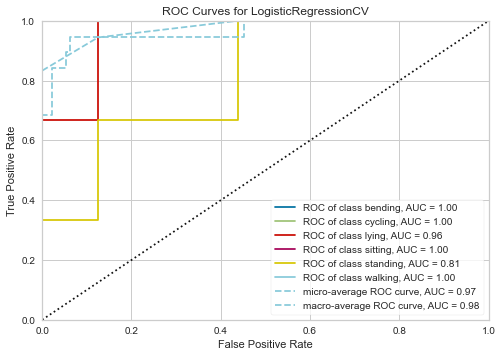

<AxesSubplot:title={'center':'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [201]:
visualizer = ROCAUC(logreg_l1, encoder={0: 'bending', 1: 'cycling', 
                                        2: 'lying', 3: 'sitting', 4: 'standing', 5: 'walking'})
                                                                         
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [203]:
# Confusion matrix.

cm = confusion_matrix(y_test, y_pred) 
cm

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 2, 0, 1, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

**ii. Repeat 2(c)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.**

In [204]:
# Gaussian Naive Bayes.

gnb = GaussianNB()
l = 0 
ls = []
max_test_scores = []
for dataset in split_training_datasets:
    l = l + 1
    
    X_train, y_train = dataset.iloc[:, :3*6*l], dataset["Type"]
    print("Training model for l =", l)
    gnb.fit(X_train, y_train)  
            
    max_test_scores.append(max(cross_val_score(gnb, X_train, y_train)))
    ls.append(l)
    
    if l == 20:
        break

Training model for l = 1
Training model for l = 2
Training model for l = 3
Training model for l = 4
Training model for l = 5
Training model for l = 6
Training model for l = 7
Training model for l = 8
Training model for l = 9
Training model for l = 10
Training model for l = 11
Training model for l = 12
Training model for l = 13
Training model for l = 14
Training model for l = 15
Training model for l = 16
Training model for l = 17
Training model for l = 18
Training model for l = 19
Training model for l = 20


In [205]:
max_test_score_index = max_test_scores.index(max(max_test_scores))
best_l = ls[max_test_score_index]
best_l

4

In [206]:
gnb = GaussianNB()
X_train = split_training_datasets[best_l-1].drop(columns = "Type")
y_train = split_training_datasets[best_l-1]["Type"]
gnb.fit(X_train, y_train) 

GaussianNB()

In [207]:
# Test the model.

X_test = split_test_datasets[best_l-1].drop(columns = "Type")
y_test = split_test_datasets[best_l-1]["Type"]
y_pred = gnb.predict(X_test)
print("Test accuracy:", accuracy_score(y_pred,y_test))
print("Test error:", 1 - accuracy_score(y_pred,y_test))

Test accuracy: 0.8947368421052632
Test error: 0.10526315789473684


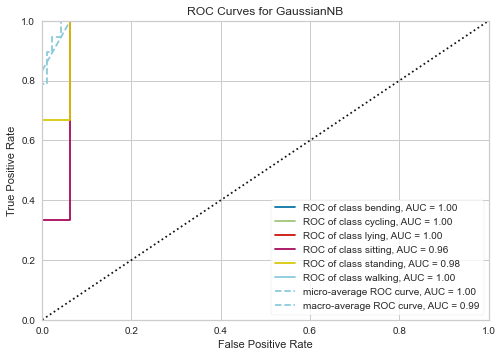

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [208]:
visualizer = ROCAUC(gnb, encoder={0: 'bending', 1: 'cycling', 
                                        2: 'lying', 3: 'sitting', 4: 'standing', 5: 'walking'})
                                                                         
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [209]:
# Confusion matrix.

cm = confusion_matrix(y_test, y_pred) 
cm

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

In [210]:
# Multinomial Naive Bayes.

mnb = MultinomialNB()
l = 0 
ls = []
max_test_scores = []
for dataset in split_training_datasets:
    l = l + 1
    
    X_train, y_train = dataset.iloc[:, :3*6*l], dataset["Type"]
    print("Training model for l =", l)
    mnb.fit(X_train, y_train)  
            
    max_test_scores.append(max(cross_val_score(gnb, X_train, y_train)))
    ls.append(l)
    
    if l == 20:
        break

Training model for l = 1
Training model for l = 2
Training model for l = 3
Training model for l = 4
Training model for l = 5
Training model for l = 6
Training model for l = 7
Training model for l = 8
Training model for l = 9
Training model for l = 10
Training model for l = 11
Training model for l = 12
Training model for l = 13
Training model for l = 14
Training model for l = 15
Training model for l = 16
Training model for l = 17
Training model for l = 18
Training model for l = 19
Training model for l = 20


In [211]:
# Find the best (l,p).

max_test_score_index = max_test_scores.index(max(max_test_scores))
best_l = ls[max_test_score_index]
best_l

4

In [212]:
mnb = MultinomialNB()
X_train = split_training_datasets[best_l-1].drop(columns = "Type")
y_train = split_training_datasets[best_l-1]["Type"]
mnb.fit(X_train, y_train) 

MultinomialNB()

In [213]:
# Test the model.

X_test = split_test_datasets[best_l-1].drop(columns = "Type")
y_test = split_test_datasets[best_l-1]["Type"]
y_pred = mnb.predict(X_test)
print("Test accuracy:", accuracy_score(y_pred,y_test))
print("Test error:", 1 - accuracy_score(y_pred,y_test))

Test accuracy: 0.8947368421052632
Test error: 0.10526315789473684


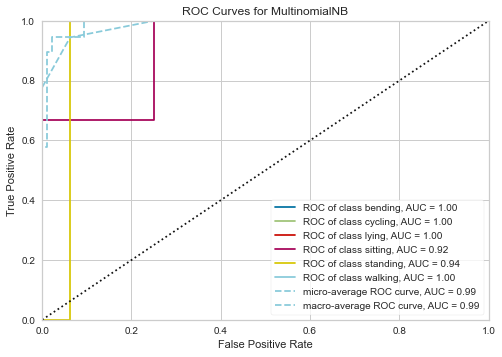

<AxesSubplot:title={'center':'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [214]:
visualizer = ROCAUC(mnb, encoder={0: 'bending', 1: 'cycling', 
                                        2: 'lying', 3: 'sitting', 4: 'standing', 5: 'walking'})
                                                                         
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [216]:
# Confusion matrix.

cm = confusion_matrix(y_test, y_pred) 
cm

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 2, 1, 0, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

The results for both Gaussian Naive Bayes and Multinomial Naive Bayes are quite similar.

**iii. Which method is better for multi-class classification in this problem?**

According to the test accuracy, confusion matrix and ROC Curve, it is safe to assume that Logistic Regression results are better in this particular problem.

**3. ISLR, 4.8.3**

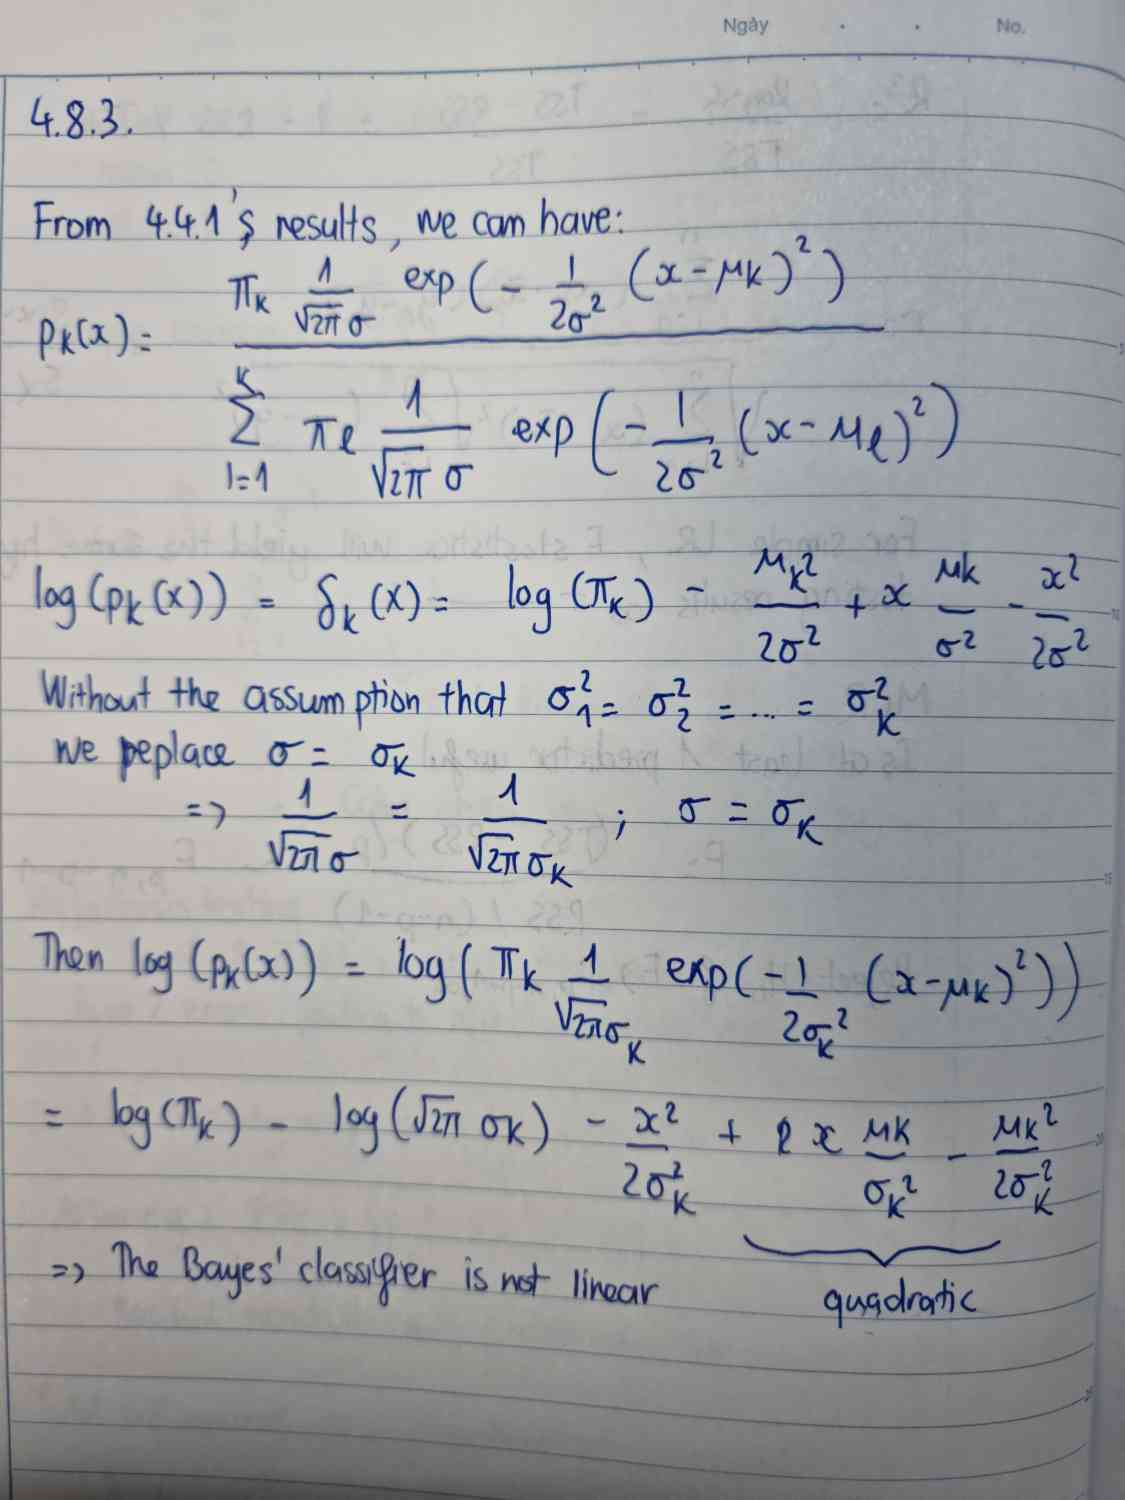

**4. ISLR 4.8.7**

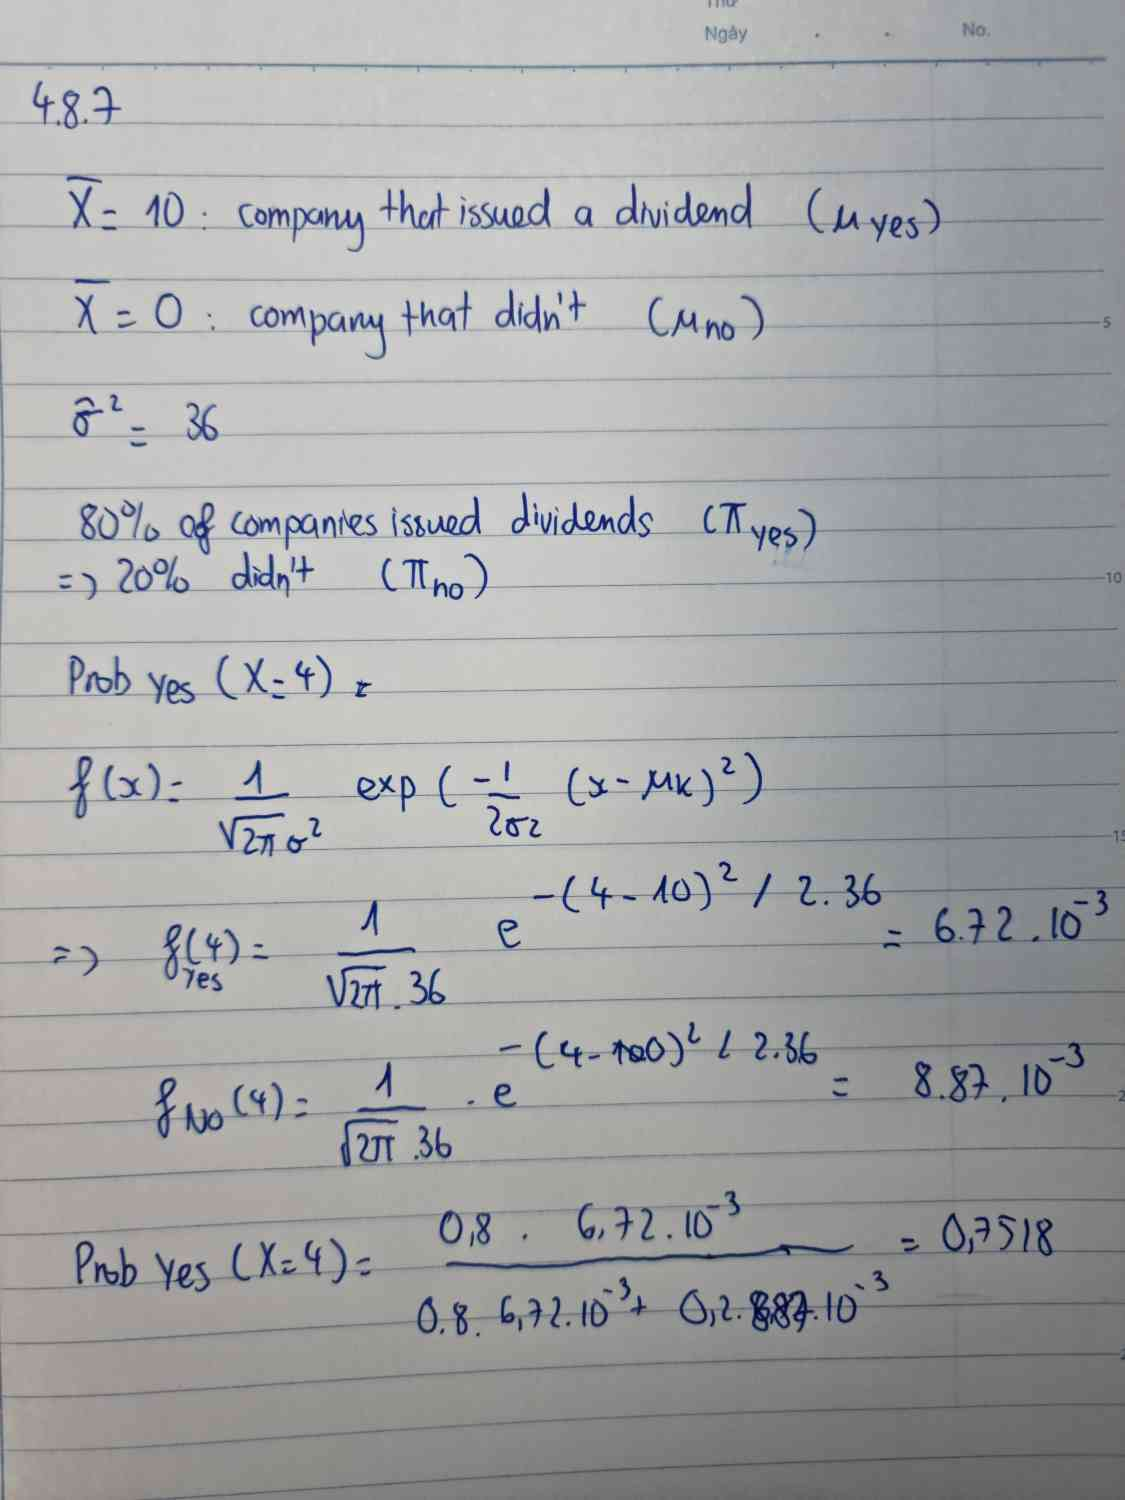